### Дискретное распределение

Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
%matplotlib inline

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [4]:
sample = np.random.choice([1, 2, 3, 4, 5, 6], 100)

Представим, что эта выборка была получена путем подбрасывания симметричного шестигранного кубика сто раз. Оценим вероятности выпадения каждой из сторон с помощью чистот.

In [5]:
from collections import Counter

In [8]:
c = Counter(sample)

print 'Число выпадений каждой из сторон:'
print c

Число выпадений каждой из сторон:
Counter({4: 28, 3: 19, 5: 15, 1: 14, 2: 13, 6: 11})


In [9]:
print 'Вероятности выпадений каждой из сторон:'
print({k: v/100.0 for k, v in c.items()})

Вероятности выпадений каждой из сторон:
{1: 0.14, 2: 0.13, 3: 0.19, 4: 0.28, 5: 0.15, 6: 0.11}


Это и есть оценка функции вероятности дискретного распределения.

### Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения.

In [10]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Эмпирическая функция распределения для полученной выборки.

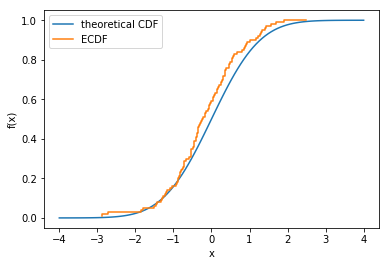

In [14]:
x = np.linspace(-4, 4, 100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

А это гистограмма выборки.

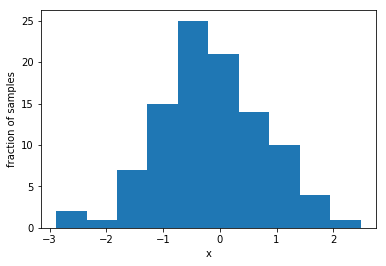

In [26]:
plt.hist(sample)
plt.ylabel('fraction of samples')
plt.xlabel('x')
plt.show()

Зададим число карманом гистограммы вручную.

Text(0.5,0,'x')

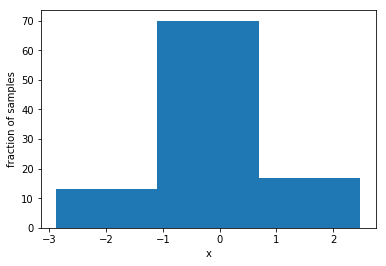

In [24]:
plt.hist(sample, bins=3)
plt.ylabel('fraction of samples')
plt.xlabel('x')

Text(0.5,0,'x')

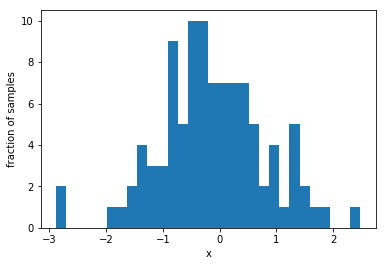

In [21]:
plt.hist(sample, bins=30)
plt.ylabel('fraction of samples')
plt.xlabel('x')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания.

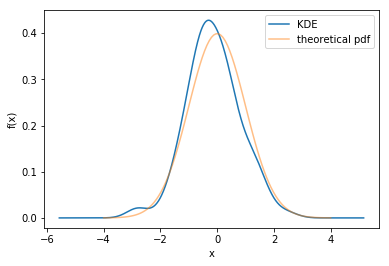

In [22]:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

#построим еще теоретическую плотность распределения
x = np.linspace(-4, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()